# Inception V3 Model | CIFAKE


In [1]:
from keras.layers import Dense, GlobalAveragePooling2D, Resizing
from keras.applications import InceptionV3
from utils import (
    build_sequential_model,
    load_augmented_data,
    plot_performance_curves,
    save_model_history,
    load_model_history,
)
import PIL
from keras.optimizers import Adam

PIL.Image.MAX_IMAGE_PIXELS = None

In [2]:
model_name = "inception-v3_model_ai-art"
dataset_base_path = "./datasets/AI art/"

# Forcefully train the model
force_model_train = False

# Don't save the model
no_save = False

In [3]:
# Load saved model and its history
model_history_loaded, classifier, history = load_model_history(model_name)

Model/history not found.


In [4]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [5]:
# Building model
if not model_history_loaded or force_model_train:
    classifier = build_sequential_model(
        layers=[
            Resizing(75, 75, interpolation="bilinear"),
            base_model,
            GlobalAveragePooling2D(),
            Dense(1024, activation="relu"),
            Dense(512, activation="relu"),
            Dense(256, activation="relu"),
            Dense(2, activation="softmax"),
        ],
        # optimizer=Adam(learning_rate=0.001)
    )

In [6]:
# Model summary
# classifier.summary()

In [7]:
# Load augmented image generators
train_generator, validation_generator = load_augmented_data(dataset_base_path)

Found 17307 images belonging to 2 classes.
Found 4328 images belonging to 2 classes.


In [8]:
# Train model
if not model_history_loaded or force_model_train:
    history = classifier.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
    )
    history = history.history

Epoch 1/10
 135/1731 [=>............................] - ETA: 5:02 - loss: 0.5240 - accuracy: 0.8044

d:\Programs\anaconda3\envs\tf-gpu\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1731/1731 [==============================] - 441s 253ms/step - loss: 0.4410 - accuracy: 0.8264 - val_loss: 0.4137 - val_accuracy: 0.8237
Epoch 2/10
1731/1731 [==============================] - 264s 152ms/step - loss: 0.4126 - accuracy: 0.8348 - val_loss: 0.4037 - val_accuracy: 0.8283
Epoch 3/10
1731/1731 [==============================] - 263s 152ms/step - loss: 0.4029 - accuracy: 0.8387 - val_loss: 0.4591 - val_accuracy: 0.8293
Epoch 4/10
1731/1731 [==============================] - 263s 152ms/step - loss: 0.3977 - accuracy: 0.8409 - val_loss: 0.4125 - val_accuracy: 0.8295
Epoch 5/10
1731/1731 [==============================] - 264s 153ms/step - loss: 0.3854 - accuracy: 0.8471 - val_loss: 0.4050 - val_accuracy: 0.8327
Epoch 6/10
1731/1731 [==============================] - 263s 152ms/step - loss: 0.3888 - accuracy: 0.8432 - val_loss: 0.3999 - val_accuracy: 0.8309
Epoch 7/10
1731/1731 [==============================] - 263s 152ms/step - loss: 0.3837 - accuracy: 0.8471 - val_loss: 0.401

In [9]:
# Save model
if not model_history_loaded or (force_model_train and not no_save) or not no_save:
    save_model_history(classifier, history, model_name)

INFO:tensorflow:Assets written to: ./models/inception-v3_model_ai-art/model\assets


INFO:tensorflow:Assets written to: ./models/inception-v3_model_ai-art/model\assets


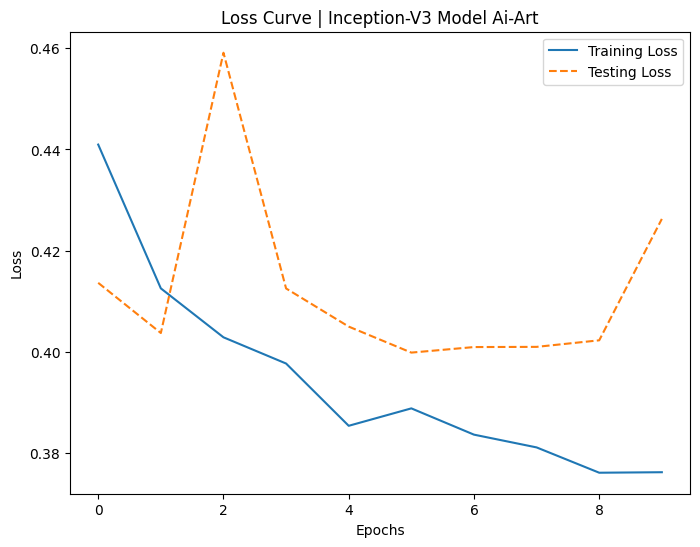

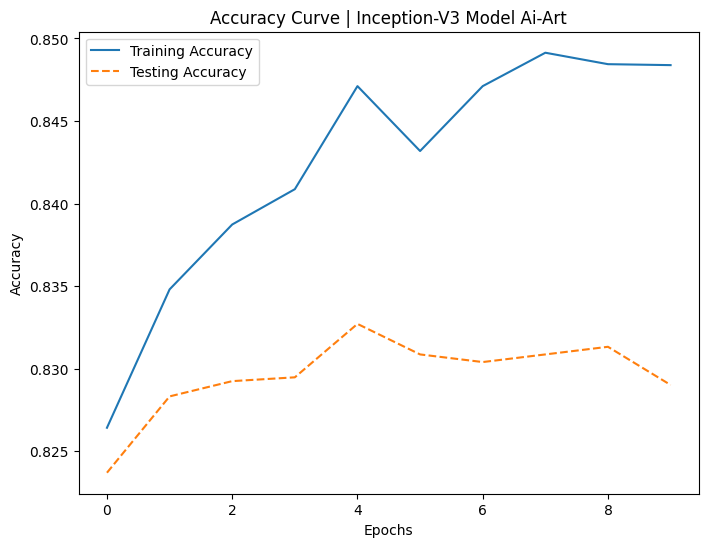

In [10]:
# Plot performance curves
plot_performance_curves(history, model_name)